# Import the packages, algorithms and metrics

In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score

# Load in data and create dataframe

In [102]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.shape, df.columns.to_list())

(5110, 12) ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


# Checking out and adjusting the data

In [103]:
#Checking out the data
# 0 is no, #1 is yes
pd.set_option("display.max.columns", None)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [104]:
#Checking for nulls
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [105]:
#We can't have nulls in the "bmi" value so I'll replace the nulls with the means

df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

In [106]:
#Checking for nulls again
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Visualizing the data

<AxesSubplot:>

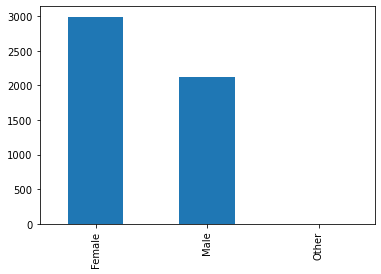

In [107]:
#Gender count
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

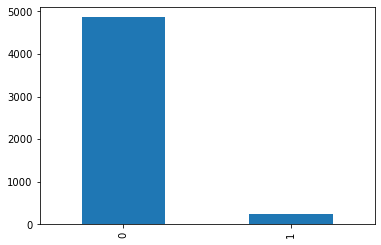

In [108]:
#Stroke count, 1 is yes and 0 is no
df['stroke'].value_counts().plot(kind='bar')

<AxesSubplot:>

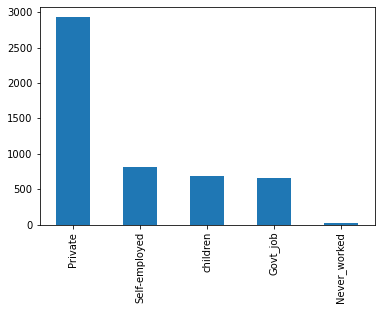

In [109]:
#Work type count
df['work_type'].value_counts().plot(kind='bar')

In [110]:
glucose_column = df["avg_glucose_level"]
bmi_column = df["bmi"]
age_column = df["age"]

<AxesSubplot:ylabel='Frequency'>

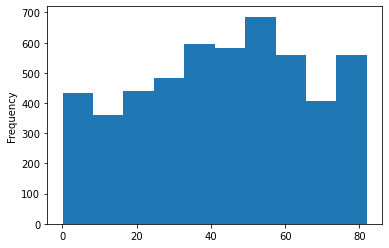

In [111]:
#Distribution of Age

age_column.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

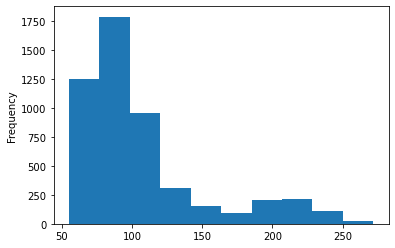

In [112]:
#Distribution of Average Glucose Level

glucose_column.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

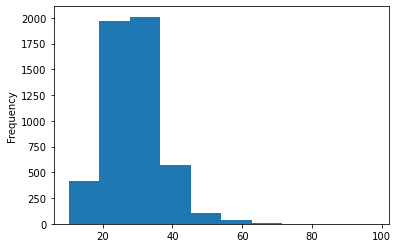

In [113]:
#Distribution of BMI

bmi_column.plot(kind="hist")

In [114]:
#Stroke information by gender

df.groupby(["gender", "stroke"]).size()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
dtype: int64

In [115]:
#Stroke information by work type

df.groupby(["work_type", "stroke"]).size()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
dtype: int64

In [116]:
#Stroke information by smoking status

df.groupby(["smoking_status", "stroke"]).size()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
dtype: int64

In [117]:
#Stroke information by married status

df.groupby(["ever_married", "stroke"]).size()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
dtype: int64

# Data Analysis

In [118]:
#Drop id column as that won't be useful for our analysis

df2 = df.drop(columns = ['id'],axis =1)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [119]:
#Converting columns with text to numbers for modelling purposes

#Gender
#Male = 1, Female = 0, Other = 2

df2 = df2.replace(to_replace = 'Male', value = 1)
df2 = df2.replace(to_replace = 'Female', value = 0)
df2 = df2.replace(to_replace = 'Other', value = 2)
df2.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,1,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,1,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,0,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,0,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,0,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [120]:
df2.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [121]:
#Work type
#Govt job = 0, Never_worked = 1, Private = 2, Self-employed = 3, Children = 4

df2["work_type"] = df2["work_type"].astype("category")
df2["work_type"] = df2["work_type"].cat.codes
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,2,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,3,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Yes,2,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,2,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,3,Rural,174.12,24.000000,never smoked,1


In [122]:
df2.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [123]:
#Smoking Status
#Unknown = 0, #Formerly smoked = 1, never smoked = 2, Smokes = 3

df2["smoking_status"] = df2["smoking_status"].astype("category")
df2["smoking_status"] = df2["smoking_status"].cat.codes
df2.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,2,Urban,228.69,36.600000,1,1
1,0,61.0,0,0,Yes,3,Rural,202.21,28.893237,2,1
2,1,80.0,0,1,Yes,2,Rural,105.92,32.500000,2,1
3,0,49.0,0,0,Yes,2,Urban,171.23,34.400000,3,1
4,0,79.0,1,0,Yes,3,Rural,174.12,24.000000,2,1
5,1,81.0,0,0,Yes,2,Urban,186.21,29.000000,1,1
6,1,74.0,1,1,Yes,2,Rural,70.09,27.400000,2,1
7,0,69.0,0,0,No,2,Urban,94.39,22.800000,2,1
8,0,59.0,0,0,Yes,2,Rural,76.15,28.893237,0,1
9,0,78.0,0,0,Yes,2,Urban,58.57,24.200000,0,1


In [124]:
#Marriage status
#Ever Married (Yes) = 1, (No) = 0

df2 = df2.replace(to_replace = 'Yes', value = 1)
df2 = df2.replace(to_replace = 'No', value = 0)
df2.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,Urban,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,Rural,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,Rural,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,Urban,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,Rural,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,Urban,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,Rural,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,Urban,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,Rural,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,Urban,58.57,24.200000,0,1


In [125]:
#Residence_type 
#(Urban) = 1, (Rural) = 0

df2 = df2.replace(to_replace = 'Urban', value = 1)
df2 = df2.replace(to_replace = 'Rural', value = 0)
df2.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


# Creating the X and Y variables

In [126]:
#Dropping out the outcome variable to prevent any errors

y = df2['stroke']
x = df2.drop(['stroke'],axis = 1)

# Train-Test split

In [128]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_oversample, y_oversample = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size = 0.2, random_state = 0)

# Getting the top features

In [131]:
#fit the decision tree and output accuracy
clf = DecisionTreeClassifier(criterion='entropy').fit(X, y)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(x, y)))

Accuracy of Decision Tree classifier: 1.00


In [132]:
# summarize feature importance, and store values under feature names in scores dictionary
importance = clf.feature_importances_
scores = {}
for i,v in enumerate(importance):
    #print('Feature: %s, Score: %.5f' % (xcols[i],v))
    scores[xcols[i]] = v

#reverse sort 'scores' dictionary by values
import operator
sorted_scores = sorted(scores.items(), key=operator.itemgetter(1),reverse=True)

#print top 10 features
for feature, score in sorted_scores[0:10]:
    print(feature, ':', score)

age : 0.30359560583099515
avg_glucose_level : 0.302533316129952
bmi : 0.19171073952022952
smoking_status : 0.05778710983949938
work_type : 0.033444331256026895
gender : 0.02997910327369959
Residence_type : 0.024959803897717254
heart_disease : 0.022846405290433667
hypertension : 0.017640477038948256
ever_married : 0.015503107922498264


<ipython-input-133-0822777bc287>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = top_feats, rotation=90)


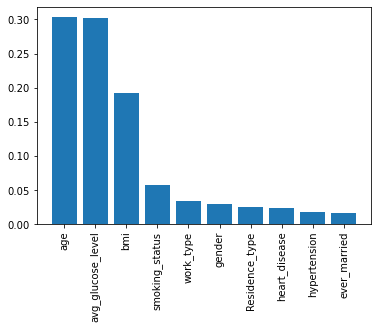

In [133]:
top_feats, top_vals = [], []
for feat_name, value in sorted_scores[0 : 10]:
    top_feats.append(feat_name)
    top_vals.append(value)

# plot feature importance for top 10 features
# plotting function
fig, ax = plt.subplots(1, 1)
feats_plot = ax.bar(top_feats, top_vals)
ax.set_xticklabels(labels = top_feats, rotation=90)
plt.show()

# Logistic regression

In [139]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
cr = classification_report(y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       973
           1       0.80      0.83      0.82       972

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.82      1945
weighted avg       0.82      0.82      0.82      1945



/Users/tricky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_log), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_log), 2))

Precision Score:  0.8
Recall Score:  0.83
F1 Score:  0.82
Accuracy Score:  0.82
ROC AUC:  0.82


# Ensemble Model: Gradient Boosting

In [141]:
# set-up grid of parameters to search
param_grid = {'n_estimators': [10, 100, 250], 'learning_rate': [.01, .1, .25],
              'subsample': [.5, 1],
              'max_depth': [3, 5]} 

# n_estimators controls how many models to aggregate (i.e., how many weak learners)
# learning rate shrinks contribution from individual models (how vigorously errors are corrected);

# max_depth controls tree depth/complexity of individual models

# instantiate grid search object
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 3)

# fitting the model for grid search 
grid.fit(x, y)

# print parameters, mean, and standard deviation of scores by iteration
for z in range(0, len(grid.cv_results_['params'])):
    print('\nparams:', grid.cv_results_['params'][z])
    print('mean of accuracies:', grid.cv_results_['mean_test_score'][z])
    print('std dev of accuracies:', grid.cv_results_['std_test_score'][z])

# print best parameter after tuning 
print('\n***best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

# store the best estimator
best_sgb = grid.best_estimator_


params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
mean of accuracies: 0.9512720119240924
std dev of accuracies: 1.3483032988480203e-05

params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1}
mean of accuracies: 0.9512720119240924
std dev of accuracies: 1.3483032988480203e-05

params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
mean of accuracies: 0.9512720119240924
std dev of accuracies: 1.3483032988480203e-05

params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
mean of accuracies: 0.9512720119240924
std dev of accuracies: 1.3483032988480203e-05

params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250, 'subsample': 0.5}
mean of accuracies: 0.9506849277304067
std dev of accuracies: 1.3645479169041602e-05

params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250, 'subsample': 1}
mean of accuracies: 0.9499019956497646
std dev of accur

# Ensemble Model: Random Forest Classifier

In [142]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       973
           1       0.93      0.96      0.95       972

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [143]:
print('Precision Score: ', round(precision_score(y_test, y_pred_rf), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_rf), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_rf), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_rf), 2))

Precision Score:  0.93
Recall Score:  0.96
F1 Score:  0.95
Accuracy Score:  0.95
ROC AUC:  0.95


# Let's Start Predicting (Using the model after grid search[best_logreg])

In [144]:
#Bringing in new randomized health data

mydata = pd.read_csv('Health_Data_For_Predictions.csv')
print(mydata.shape, mydata.columns.to_list(),'\n')
mydata

(57, 10) ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'] 



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,66,0,0,Yes,Self-employed,Urban,101.45,NaN,Unknown
1,Female,79,0,0,No,Private,Rural,88.92,22.9,never smoked
2,Female,68,1,0,No,Self-employed,Urban,79.79,29.7,never smoked
3,Male,58,0,0,Yes,Private,Urban,71.20,NaN,Unknown
4,Male,54,0,0,Yes,Private,Rural,96.97,29.1,smokes
5,Male,61,0,1,Yes,Private,Rural,111.81,27.3,smokes
6,Female,70,0,1,Yes,Private,Rural,59.35,32.3,formerly smoked
7,Male,47,0,0,Yes,Private,Urban,86.94,41.1,formerly smoked
8,Male,74,0,0,Yes,Private,Urban,98.55,25.6,Unknown
9,Female,79,0,1,Yes,Private,Urban,226.98,29.8,never smoked


In [145]:
#Checking for nulls
mydata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  4
smoking_status       0
dtype: int64

In [146]:
#We can't have nulls in the "bmi" value so I'll replace the nulls with the means

mydata['bmi'].fillna(value=mydata['bmi'].mean(), inplace=True)

In [147]:
#Checking for nulls
mydata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

# Data Analysis

In [148]:
#Converting columns with text to numbers for predicting purposes

#Gender
#Male = 1, Female = 0, Other = 2

mydata = mydata.replace(to_replace = 'Male', value = 1)
mydata = mydata.replace(to_replace = 'Female', value = 0)
mydata = mydata.replace(to_replace = 'Other', value = 2)
mydata.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,66,0,0,Yes,Self-employed,Urban,101.45,30.328302,Unknown
1,0,79,0,0,No,Private,Rural,88.92,22.900000,never smoked
2,0,68,1,0,No,Self-employed,Urban,79.79,29.700000,never smoked
3,1,58,0,0,Yes,Private,Urban,71.20,30.328302,Unknown
4,1,54,0,0,Yes,Private,Rural,96.97,29.100000,smokes
5,1,61,0,1,Yes,Private,Rural,111.81,27.300000,smokes
6,0,70,0,1,Yes,Private,Rural,59.35,32.300000,formerly smoked
7,1,47,0,0,Yes,Private,Urban,86.94,41.100000,formerly smoked
8,1,74,0,0,Yes,Private,Urban,98.55,25.600000,Unknown
9,0,79,0,1,Yes,Private,Urban,226.98,29.800000,never smoked


In [149]:
#Work Type

#Govt job = 0, Never_worked = 1, Private = 2, Self-employed = 3, Children = 4

mydata["work_type"] = mydata["work_type"].astype("category")
mydata["work_type"] = mydata["work_type"].cat.codes
mydata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,66,0,0,Yes,3,Urban,101.45,30.328302,Unknown
1,0,79,0,0,No,2,Rural,88.92,22.900000,never smoked
2,0,68,1,0,No,3,Urban,79.79,29.700000,never smoked
3,1,58,0,0,Yes,2,Urban,71.20,30.328302,Unknown
4,1,54,0,0,Yes,2,Rural,96.97,29.100000,smokes


In [150]:
#Smoking status

#Unknown = 0, #Formerly smoked = 1, never smoked = 2, Smokes = 3

mydata["smoking_status"] = mydata["smoking_status"].astype("category")
mydata["smoking_status"] = mydata["smoking_status"].cat.codes
mydata.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,66,0,0,Yes,3,Urban,101.45,30.328302,0
1,0,79,0,0,No,2,Rural,88.92,22.900000,2
2,0,68,1,0,No,3,Urban,79.79,29.700000,2
3,1,58,0,0,Yes,2,Urban,71.20,30.328302,0
4,1,54,0,0,Yes,2,Rural,96.97,29.100000,3
5,1,61,0,1,Yes,2,Rural,111.81,27.300000,3
6,0,70,0,1,Yes,2,Rural,59.35,32.300000,1
7,1,47,0,0,Yes,2,Urban,86.94,41.100000,1
8,1,74,0,0,Yes,2,Urban,98.55,25.600000,0
9,0,79,0,1,Yes,2,Urban,226.98,29.800000,2


In [151]:
#Marriage Status

#Ever Married (Yes) = 1, (No) = 0

mydata = mydata.replace(to_replace = 'Yes', value = 1)
mydata = mydata.replace(to_replace = 'No', value = 0)
mydata.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,66,0,0,1,3,Urban,101.45,30.328302,0
1,0,79,0,0,0,2,Rural,88.92,22.900000,2
2,0,68,1,0,0,3,Urban,79.79,29.700000,2
3,1,58,0,0,1,2,Urban,71.20,30.328302,0
4,1,54,0,0,1,2,Rural,96.97,29.100000,3
5,1,61,0,1,1,2,Rural,111.81,27.300000,3
6,0,70,0,1,1,2,Rural,59.35,32.300000,1
7,1,47,0,0,1,2,Urban,86.94,41.100000,1
8,1,74,0,0,1,2,Urban,98.55,25.600000,0
9,0,79,0,1,1,2,Urban,226.98,29.800000,2


In [152]:
#Residence_type 
#(Urban) = 1, (Rural) = 0

mydata = mydata.replace(to_replace = 'Urban', value = 1)
mydata = mydata.replace(to_replace = 'Rural', value = 0)
mydata.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,66,0,0,1,3,1,101.45,30.328302,0
1,0,79,0,0,0,2,0,88.92,22.900000,2
2,0,68,1,0,0,3,1,79.79,29.700000,2
3,1,58,0,0,1,2,1,71.20,30.328302,0
4,1,54,0,0,1,2,0,96.97,29.100000,3
5,1,61,0,1,1,2,0,111.81,27.300000,3
6,0,70,0,1,1,2,0,59.35,32.300000,1
7,1,47,0,0,1,2,1,86.94,41.100000,1
8,1,74,0,0,1,2,1,98.55,25.600000,0
9,0,79,0,1,1,2,1,226.98,29.800000,2


In [153]:
#Creating the list for which we will use to predict

xcols4 = mydata.columns.to_list()
print(xcols4,'\n')

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'] 



In [154]:
#Prediction

pred = log.predict(mydata[xcols4])

In [155]:
#As we can see, the model predicts some people are at risk at having a stroke (1) while others are not (0)
print(pred)

[1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0]


In [156]:
mydata['Stroke'] = pred.tolist()

In [157]:
print(mydata)

    gender  age  hypertension  heart_disease  ever_married  work_type  \
0        0   66             0              0             1          3   
1        0   79             0              0             0          2   
2        0   68             1              0             0          3   
3        1   58             0              0             1          2   
4        1   54             0              0             1          2   
5        1   61             0              1             1          2   
6        0   70             0              1             1          2   
7        1   47             0              0             1          2   
8        1   74             0              0             1          2   
9        0   79             0              1             1          2   
10       1   81             0              0             1          2   
11       0   57             0              0             0          3   
12       0   80             1              0       

In [158]:
#Storing the results

mydata.to_csv(r'/Users/tricky/Desktop/Stroke Prediction Project/Stroke_Predictions.csv')